# What is a time series data and how does it differ from other datasets having a datetime column

Time series data is a sequence of data points collected or recorded at regular time intervals. Each data point in a time series is associated with a specific timestamp, and the order of these data points is significant. The key characteristics of time series data that distinguish it from other datasets with a datetime column are:

1. **Sequential Order**: In time series data, the order of observations is crucial. The sequence in which the data is recorded reflects the evolution of the variable of interest over time. This order is not just a feature of the data; it is the central structure around which analysis is built.

2. **Fixed Interval**: Observations in time series data are taken at consistent intervals, be it hourly, daily, monthly, annually, etc. This regularity is a defining feature of time series data.

3. **Time-Dependent Relationships**: The primary analytical focus in time series data is to understand and model the temporal relationships and dynamics. Time series analysis often seeks to predict future values based on past behavior, understand seasonal patterns, or identify trends over time.

4. **Autocorrelation**: A key property of time series data is that, typically, the value at one point in time is correlated with values at previous times (lagged values). This concept is known as autocorrelation or serial correlation.

In contrast, datasets with a datetime column might not exhibit these characteristics:

- The datetime column may simply be a timestamp of when the data was recorded, without the assumption that the time aspect is central to the analysis.
- The intervals between each timestamp might be irregular or not integral to the analysis.
- The order of the data might not be meaningful, and the data points could be independent of each other, lacking the autocorrelation often seen in time series data.

For instance, a customer database with a datetime column indicating when an account was created is not a time series dataset if the main focus is on customer attributes rather than analyzing trends or patterns over time. In contrast, daily sales data recorded over several years is a typical example of time series data, where understanding trends, seasonality, and forecasting future sales are central to the analysis.

# Problem Statement

In order to efficiently manage the business and manpower for the coming months, the ABC airlines want to forecast the number of bookings expected for the next two quarters. You are provided with the data for past 19 months (from 26-08-2012 to 25-03-2014) and you have to forecast the values for the next two quarters (26-03-2014 to 25-09-2014).

**Data Description**
- Date: Store the date when the observation was taken
- Count: Holds the number of bookings for the given date

# Reading Time Series Data 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [25]:
data = pd.read_csv("../train_data.csv")

In [26]:
data.shape

(534, 2)

In [53]:
data.tail(20)

,count
Date,
2014-01-21,207
2014-01-22,200
2014-01-23,252
2014-01-24,178
2014-01-25,97
2014-01-26,123
2014-01-27,227
2014-01-28,215
2014-01-29,193


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    534 non-null    object
 1   count   534 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.5+ KB


# Time Series Data Visualization

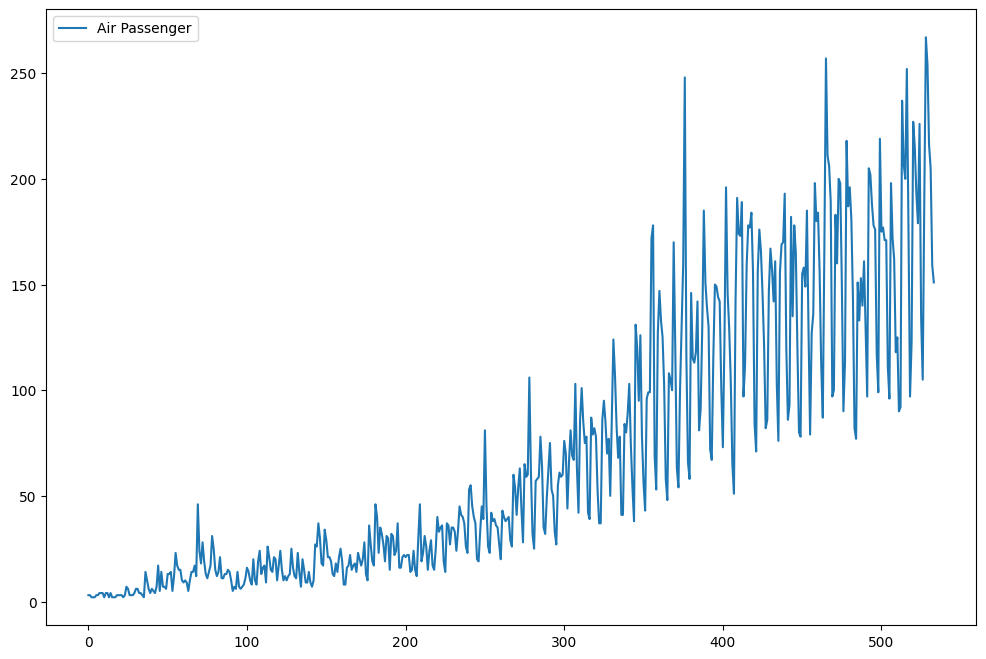

In [29]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['count'], label='Air Passenger') # line chart
plt.legend(loc='best')
plt.show()

In [30]:
data.dtypes

Date     object
count     int64
dtype: object

### Convert the object to datetime format

The format depends on your data. Here are a few examples

    1/12/2001: %d/%m/%Y
    2001/12/1: %Y/%m/%d
    2001-12-01: %Y-%m-%d
    2001-12-01 09:00: %Y-%m-%d %H:%M

In [31]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [32]:
data.dtypes

Date     datetime64[ns]
count             int64
dtype: object

In [33]:
data['Date'].min(), data['Date'].max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-02-09 00:00:00'))

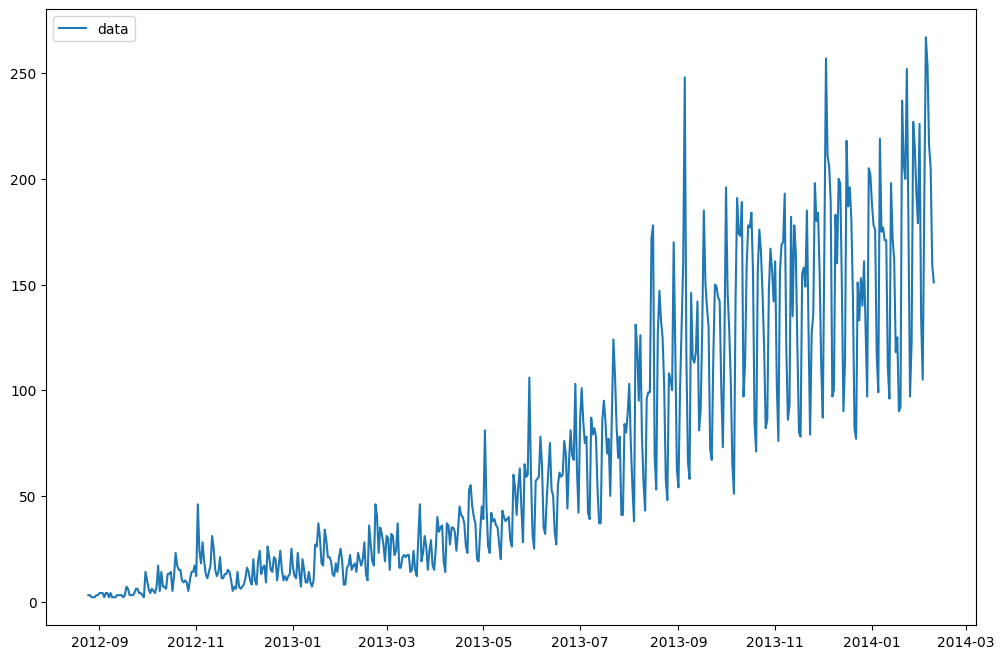

In [34]:
plt.figure(figsize=(12,8))

plt.plot(data.Date, data['count'], label='data')
plt.legend(loc='best')
plt.show()

## Lag Plots

Used to check if a data set or time series is random. A lag plot compares data points from each observation in the dataset against data points from a previous observation.

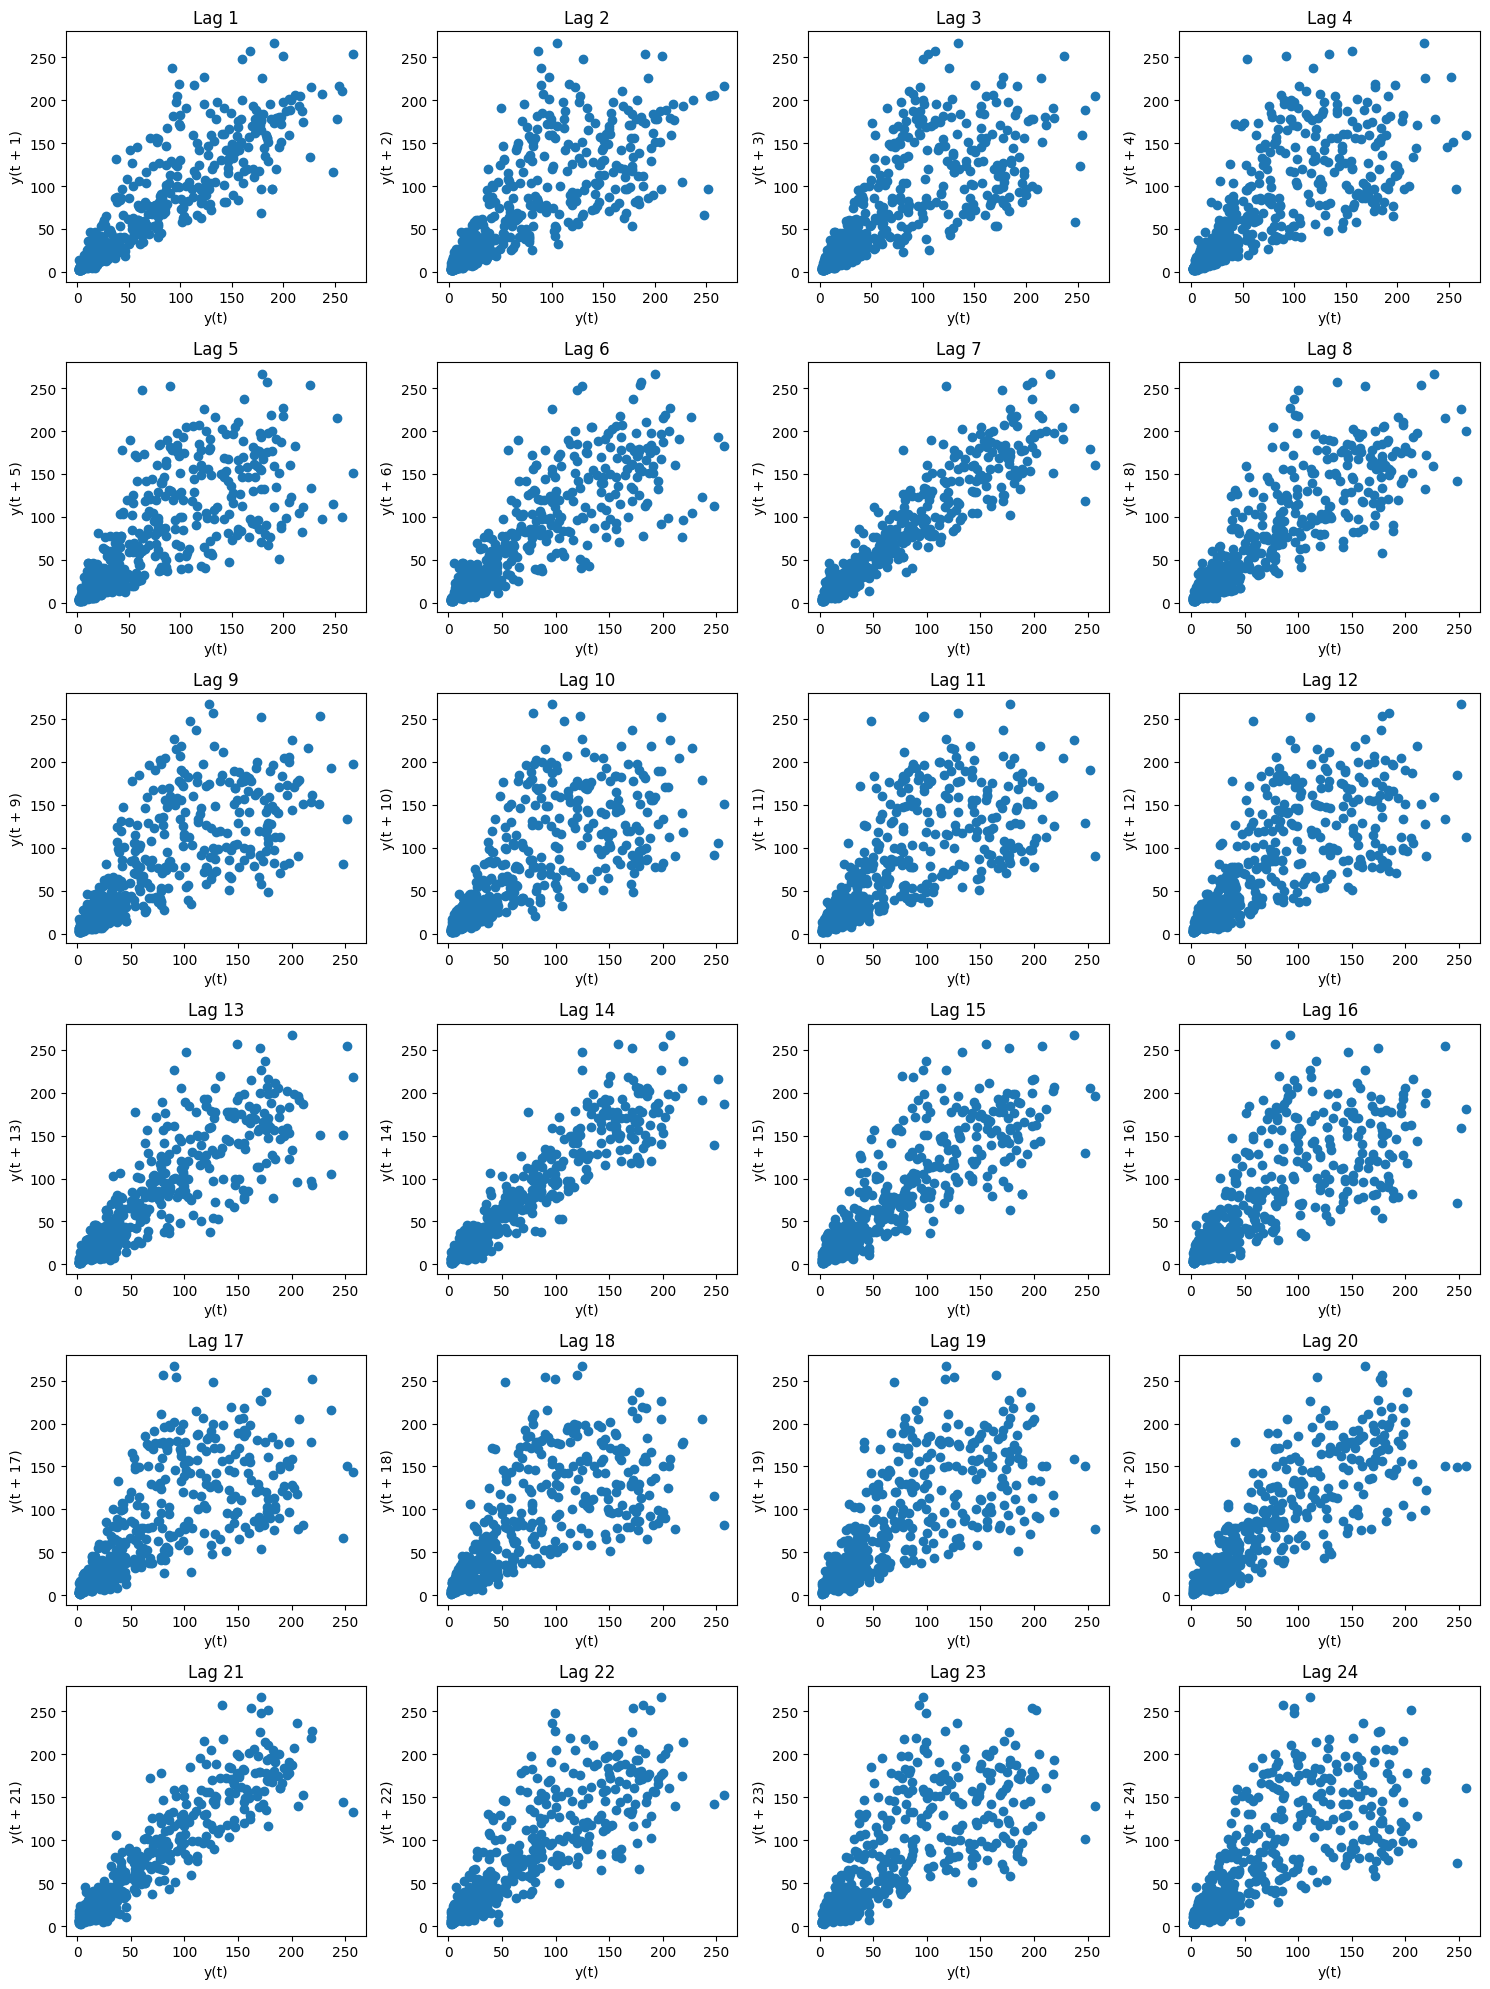

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

series = data['count'] 

# Setting up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Creating lag plots for lags 1 to 24
for i in range(1, 25):
    lag_plot(series, lag=i, ax=axes[i-1])
    axes[i-1].set_title(f'Lag {i}')

plt.tight_layout()
plt.show()


### From the above lag plots we see a very stron correlation with the lag values at multiples of 7 (7 days, 14 ,days and 21 days dispaly the strongest correlation in the above scatter plots). 

### Hence for this dataset we can colclude that there is visible seasonality for 7 days.

## How to identify seasonlity from lag plots ?

Identifying seasonality in time series data using lag plots involves looking for patterns or relationships that repeat at regular intervals. Lag plots display the value of a time series at one time point against its value at a previous time point (the lag). Here's how you can identify seasonality using lag plots:

1. **Regular Patterns**: In the presence of seasonality, lag plots will often show a clear and repeating pattern. For instance, if there is a monthly seasonality in daily data, the lag plot at a lag of 30 days might show a distinct pattern, with points clustering in a specific manner.

2. **Correlation**: If the data points in the lag plot are more structured or form a clear pattern (rather than being randomly scattered), it suggests correlation. A strong correlation at specific lags indicates seasonality. For example, in monthly data with annual seasonality, you might notice a stronger pattern at lags of 12, 24, 36 months, etc.

3. **Consistent Patterns at Specific Lags**: To confirm seasonality, look for consistency in the pattern at multiples of a specific lag. If the pattern repeats at consistent intervals (like every 12 months in monthly data), it's a strong indicator of seasonality.

4. **Lag Plots at Different Lags**: You should examine a range of lag plots. For instance, if you suspect monthly seasonality in daily data, you would look at lag plots for 30 days, 60 days, 90 days, etc., to see if a pattern consistently emerges.

5. **Comparing Lag Plots**: Compare lag plots at suspected seasonal intervals with those at non-seasonal intervals. If the structure of the plot appears more pronounced or regular at certain lags (e.g., 12 months, 24 months), this can be indicative of seasonality.

6. **Absence of Randomness**: In a purely random time series (no seasonality or trend), the lag plot will show no discernible pattern or structure. The presence of any systematic structure in the lag plot suggests some form of underlying pattern, like seasonality.

# Decomposition of Time Series Data

- Level
- Trend 
- Seasonlity


count = level + trend + seasonlity + residual  >> Additive model

count = level x trend x seasonlity + residual  >> Multiplcative model

In [35]:
data.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Converting 'Date' to datetime and setting it as the index
data.set_index('Date', inplace=True)

data.head()

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2
2012-08-28,2
2012-08-29,2


In [69]:
# Assuming a daily frequency for the time series
# Applying seasonal decomposition with an additive model
decomposition = seasonal_decompose(data['count'], model='multiplicative', period=7)

# Extracting the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [70]:
trend

Date
2012-08-25           NaN
2012-08-26           NaN
2012-08-27           NaN
2012-08-28      2.571429
2012-08-29      2.714286
                 ...    
2014-02-05    199.571429
2014-02-06    206.142857
2014-02-07           NaN
2014-02-08           NaN
2014-02-09           NaN
Name: trend, Length: 534, dtype: float64

In [71]:
# Creating a dataframe to display the components
decomposed_df = pd.concat([trend, seasonal, residual], axis=1)
decomposed_df.columns = ['Trend', 'Seasonality', 'Residual']

# Displaying the first few rows of the decomposed components
decomposed_df.head(20)

,Trend,Seasonality,Residual
Date,,,
2012-08-25,NaN,0.717626,NaN
2012-08-26,NaN,0.709891,NaN
2012-08-27,NaN,1.178889,NaN
2012-08-28,2.571429,1.149017,0.676907
2012-08-29,2.714286,1.047805,0.703225
2012-08-30,2.857143,1.101570,0.953185
2012-08-31,3.142857,1.095202,0.871570
2012-09-01,3.142857,0.717626,1.773525
2012-09-02,3.428571,0.709891,1.643444


## Plotting the decomposed components

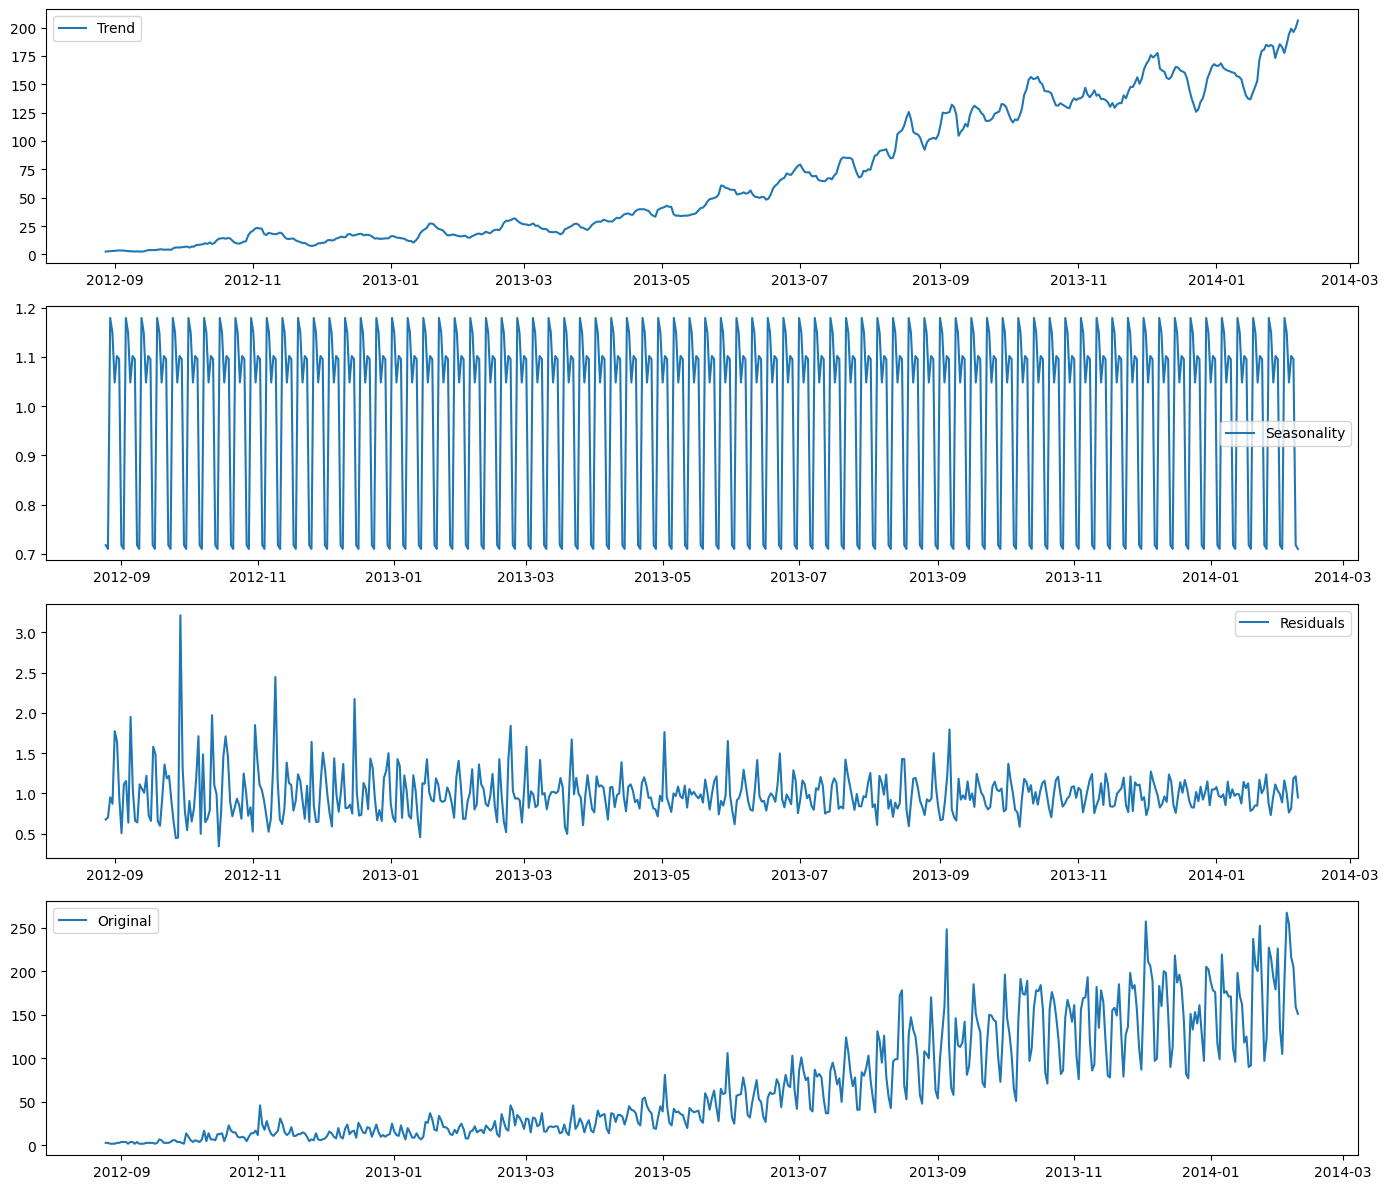

In [75]:
plt.figure(figsize=(14, 12))

# Plotting the trend
plt.subplot(411)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

# Plotting the seasonality
plt.subplot(412)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

# Plotting the residuals
plt.subplot(413)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

# Plotting the original data
plt.subplot(414)
plt.plot(data['count'], label='Original')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Plotting the Moving Average of Time series 

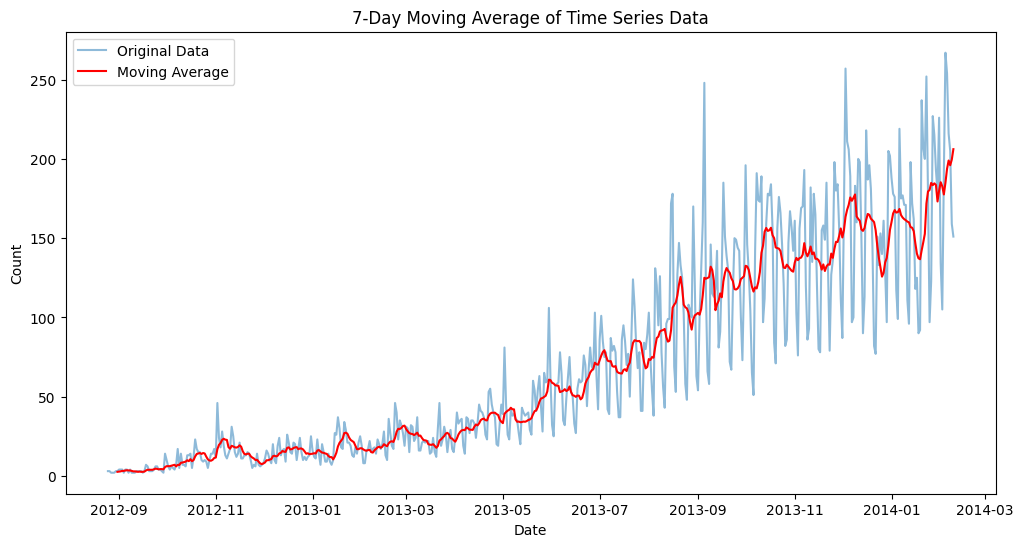

In [62]:
# Calculate moving averages
# You can change the window size as needed
rolling_window_size = 7  # 7-day moving average
data['Moving_Average'] = data['count'].rolling(window=rolling_window_size).mean()

# Plotting the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(data['count'], label='Original Data', alpha=0.5)
plt.plot(data['Moving_Average'], label='Moving Average', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('7-Day Moving Average of Time Series Data')
plt.show()
